<h5>Import Libraries adn data 

In [2584]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score , accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [2585]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h5> look in the data 

In [2586]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [2587]:
df.shape

(891, 12)

In [2588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2589]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

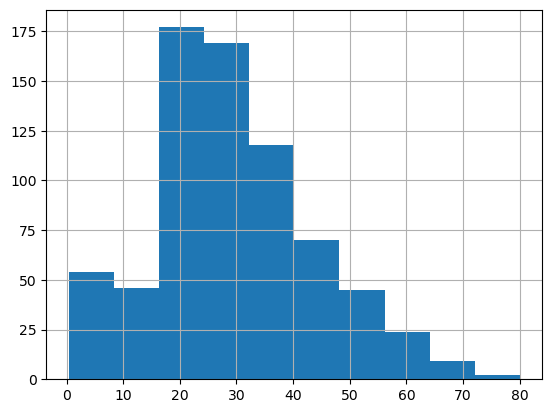

In [2590]:
df["Age"].hist()

<Axes: >

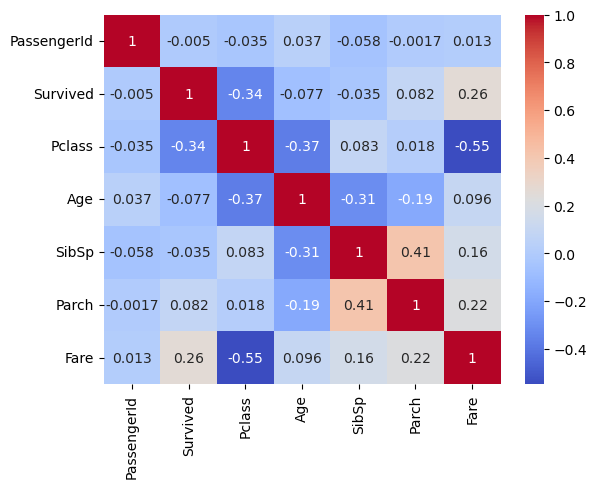

In [2591]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

<Axes: >

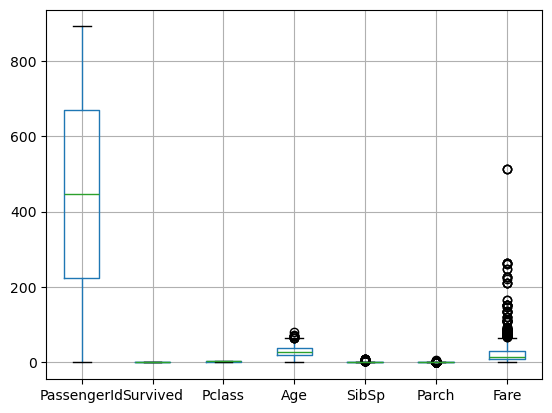

In [2592]:
df.boxplot()

<Axes: ylabel='Age'>

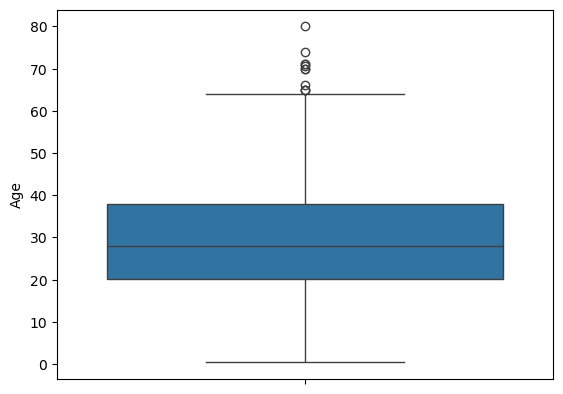

In [2593]:
sns.boxplot(df["Age"])

In [2594]:
df.loc[df["Age"]>65, ["Age","Survived"]]

,Age,Survived
33,66.0,0
96,71.0,0
116,70.5,0
493,71.0,0
630,80.0,1
672,70.0,0
745,70.0,0
851,74.0,0


In [2595]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [2596]:
df.loc[(df["Age"]>0)&(df["Age"]<1), ["Age","Survived"]]

,Age,Survived
78,0.83,1
305,0.92,1
469,0.75,1
644,0.75,1
755,0.67,1
803,0.42,1
831,0.83,1


<h5> Data cleaning

In [2597]:
df["Age"].fillna(df["Age"].median(), inplace=True)

C:\Users\nice\AppData\Local\Temp\ipykernel_11020\2097741607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [2598]:
df['Age'] = round(df['Age']).astype('int')


In [2599]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

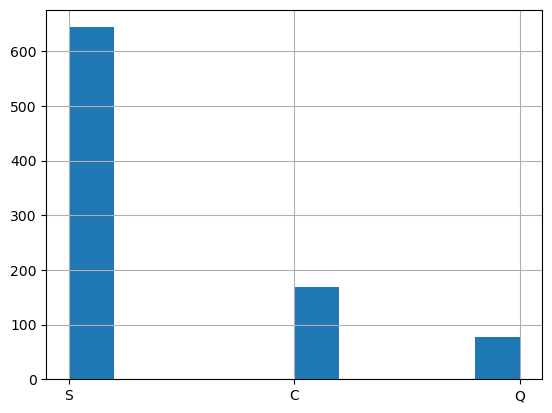

In [2600]:
df["Embarked"].hist()

In [2601]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

C:\Users\nice\AppData\Local\Temp\ipykernel_11020\122844256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [2602]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [2603]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [2604]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


<Axes: >

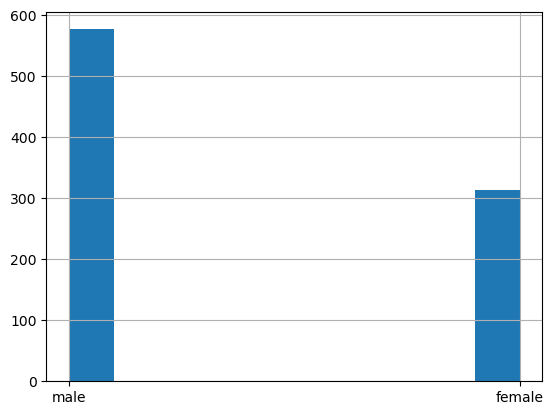

In [2605]:
df["Sex"].hist()

In [2606]:
df["Sex"]=df["Sex"].apply(lambda x: 1 if x == "male" else 0)

In [2607]:
df["Sex"]=pd.to_numeric(df["Sex"], errors="coerce")

<Axes: xlabel='Sex', ylabel='count'>

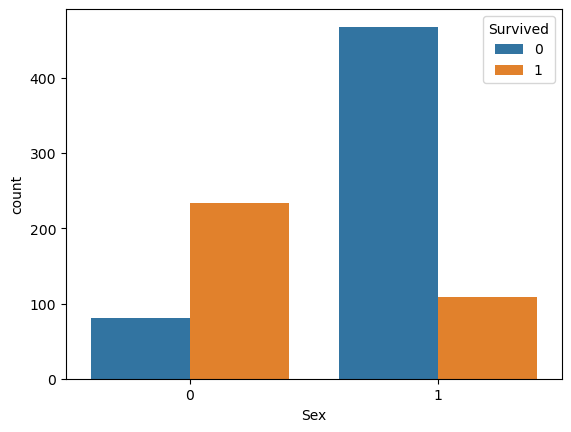

In [2608]:
sns.countplot(x="Sex",hue="Survived",data=df)

In [2609]:
man=df.loc[(df["Sex"]==1)&(df["Survived"]==1)]

<Axes: >

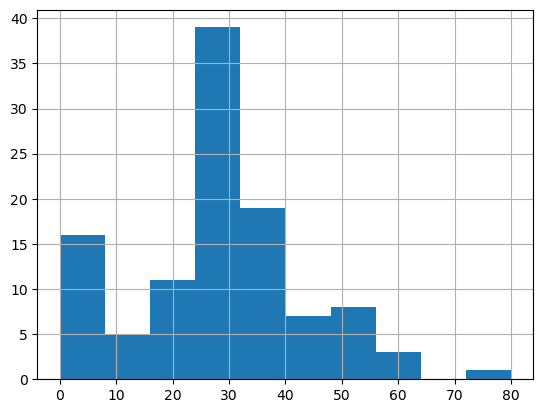

In [2610]:
man["Age"].hist()

<Axes: >

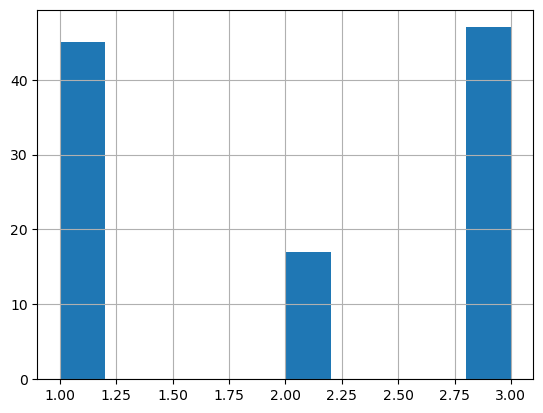

In [2611]:
man["Pclass"].hist()

In [2612]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [2613]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S


In [2614]:
df = df.drop(["Cabin", "Name", "Ticket","PassengerId"], axis=1)

In [2615]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,S
887,1,1,0,19,0,0,30.0000,S
888,0,3,0,28,1,2,23.4500,S
889,1,1,1,26,0,0,30.0000,C


In [2616]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,S
887,1,1,0,19,0,0,30.0000,S
888,0,3,0,28,1,2,23.4500,S
889,1,1,1,26,0,0,30.0000,C


<h5> feature engineering

In [2617]:
df["Familysize"]=df["SibSp"]+df["Parch"]+1
df["isalone"]=df["Familysize"].apply(lambda x: 1 if x==1 else 0)

In [2618]:
bins=[0,5,15,30,50,100]
labels=[0,1,2,3,4]
df["AgeGroup"]=pd.cut(df["Age"],bins=bins,labels=labels)

In [2619]:
df.dropna(subset=["AgeGroup"], inplace=True)

In [2620]:
df["Fare"].max()

512.3292

In [2621]:
df['FarePerPerson']=df['Fare']/df['Familysize']
df['FarePerPersonBin']=pd.qcut(df['FarePerPerson'],4,labels=[0, 1, 2, 3])
print(df['FarePerPersonBin'].value_counts())

FarePerPersonBin
0    225
2    223
3    222
1    220
Name: count, dtype: int64


<Axes: ylabel='Fare'>

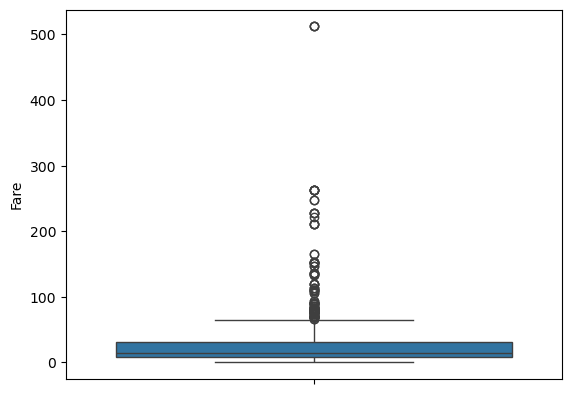

In [2622]:
sns.boxplot(df["Fare"])

In [2623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 890
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Survived          890 non-null    int64   
 1   Pclass            890 non-null    int64   
 2   Sex               890 non-null    int64   
 3   Age               890 non-null    int32   
 4   SibSp             890 non-null    int64   
 5   Parch             890 non-null    int64   
 6   Fare              890 non-null    float64 
 7   Embarked          890 non-null    object  
 8   Familysize        890 non-null    int64   
 9   isalone           890 non-null    int64   
 10  AgeGroup          890 non-null    category
 11  FarePerPerson     890 non-null    float64 
 12  FarePerPersonBin  890 non-null    category
dtypes: category(2), float64(2), int32(1), int64(7), object(1)
memory usage: 82.1+ KB


<Axes: >

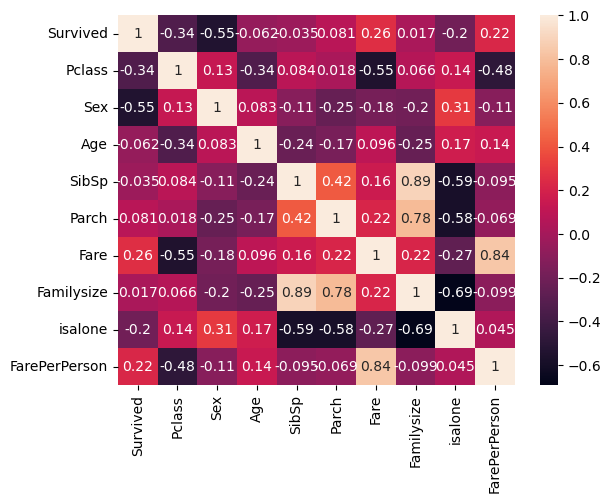

In [2624]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Survived'),
  Text(1, 0, 'Pclass'),
  Text(2, 0, 'Sex'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'SibSp'),
  Text(5, 0, 'Parch'),
  Text(6, 0, 'Fare'),
  Text(7, 0, 'Familysize'),
  Text(8, 0, 'isalone'),
  Text(9, 0, 'FarePerPerson')])

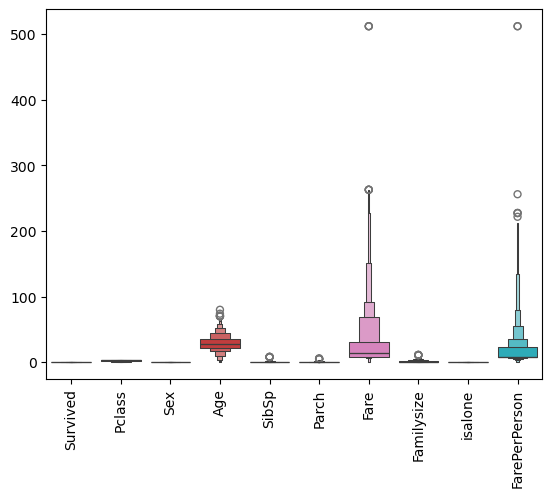

In [2625]:
sns.boxenplot(df)
plt.xticks(rotation=90)

<h5> Select the coloums , make a model and spilt the data

In [2626]:
x=df[["Pclass","Sex","Fare","Familysize","isalone","AgeGroup"]]
y=df[["Survived"]]

In [2627]:
x_train, x_test , y_train , y_test=train_test_split(x,y,random_state=42,test_size=.2)

In [2628]:
model=LogisticRegression()

In [2629]:
model.fit(x_train,y_train)

c:\Users\nice\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [2630]:
y_predic=model.predict(x_test)

<h5> the accuracy

In [2631]:
accuracy_score(y_test,y_predic)*100

84.26966292134831